In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', 
                 names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
print(df.head())

# Create target variable array 'y' and set it to have a binary outcome by transforming df['accep']
acc_dic = {"unacc": 1}
for a_var in df.accep.unique():
  if a_var != "unacc":
    acc_dic[a_var] = 0
y = df.accep.map(acc_dic)
print(y)    
# Create feature matrix 'X' by transforming the rest of the columns to be one-hot encoded variables
X = pd.get_dummies(df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']])
print(X.head())
print(X.columns)
print(X.shape)

  buying  maint doors persons lug_boot safety  accep
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
0       1
1       1
2       1
3       1
4       1
       ..
1723    0
1724    0
1725    1
1726    0
1727    0
Name: accep, Length: 1728, dtype: int64
   buying_high  buying_low  buying_med  buying_vhigh  maint_high  maint_low  \
0        False       False       False          True       False      False   
1        False       False       False          True       False      False   
2        False       False       False          True       False      False   
3        False       False       False          True       False      False   
4        False       False       False          True       False      False   

   maint_med  maint_vhigh  doors_2  doors_3  ...  doors_5

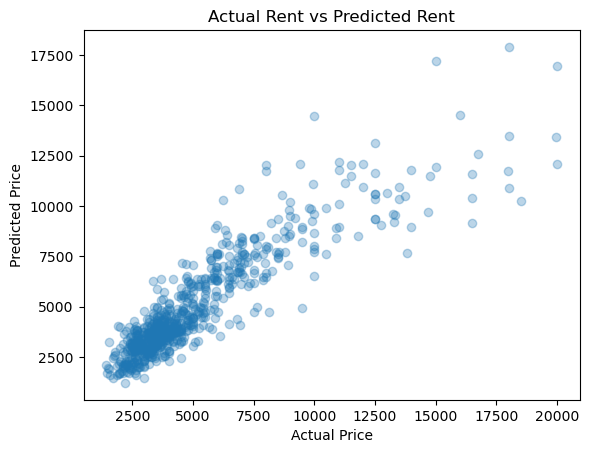

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]
[-344.68587986]
Train score:
0.7725460559817883
Test score:
0.8050371975357679


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model=lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

print(lm.coef_)
print(lm.intercept_)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor

# Import the data set
X, y = load_diabetes(return_X_y=True)

# Create the SGD linear regression model
# max_iter is the maximum number of iterations of SGD to try before halting
sgd = SGDRegressor(max_iter = 10000)

# Fit the model to the data
sgd.fit(X, y)

# Print the coefficients of the model
print(sgd.coef_)

# Print R^2
print(sgd.score(X, y))

[  13.01583098 -175.42736554  461.04165955  289.41873874  -32.29579316
  -93.22431658 -202.54800606  130.20755824  384.44121605  124.19444524]
0.5073773271429103
